# Badanie liczby samochodów osobowych w Polsce w 2021 roku  z wykorzystaniem modelowania ekonometrycznego

#### Autorzy:
* Magdalena Biczak
* Wiktoria Galarowicz


#### Wstęp i cel badania

Niniejsza praca badawcza poświęcona jest sprawdzeniu czy czynniki takie jakdługość dróg rowerowych, długość lini kolejowych, </br>
długość dróg ekspresowych i autostrad, liczba ofiar śmiertelnych, przeciętne miesięczne wynagrodzenie brutto, liczba miejsc noclegowych </br>
i położenie we wschodniej części Polski wpływają na kształtowanie się liczby samochodów osobowych w 2021 roku w Polsce. </br>
Poniżej przeanalizowane zjawisko dotyczy aktualnych aspektów ludzkiego życia we współczesnym świecie.

#### Pytania badawcze

1. Jak kształtują się średnie wartości zmiennej: liczba samochodów osobowych w podziale na wschodnią oraz zachodnią część Polski?
    w podziale na wschodnią i zachodnią część kraju
2. Czy można zaobserowować korelacje między zmiennymi?
3. Jak prezentuje się postać liniowego modelu ekonometrycznego?
4. Czy oszacowane modele są istotne?
5. Czy reszty modeli mają rozkład normalny?


#### Opis danych

Wykorzystane w analizie dane podzielone są na województwa. </br>
W związku z tak określonym problemem badawczym zmienną objaśniającą</br> 
jest Y- liczba samochodów osobowych, a zmiennymi objaśniającymi kolejno wymienione czynniki:
* `drogi_dla_rowerów` - długość dróg rowerowych w kilometrach na 100 km^2
* `linie_kolejowe` - długość lini kolejowych w kilometrach na 100 km^2
* `drogi_ekspresowe_i_autostrady` - długość dróg espresowych i autostrad w kilometrach na 100 km^2
* `ofiary_śmiertelne` - liczba ofiar śmiertelnych na 100 tys. pojazdów
* `przeciętne_wynagrodzenie` - średnie miesięczne wynagrodzenie brutto w zł
* `miejsca_noclegowe` - liczba miejsc noclegowych na tysiąc ludności
* `ściana_wschodnia` - czy województwo znajduje się na wschodzie kraju

Wykorzystane dane przekrojowe pochodzą z internetowych baz danych Głównego Urzędu Statystycznego. Są one wiarygodne, kompletne i rzetelne.

#### Importowanie bibliotek

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### Importowanie danych
Ustawienie nazw województw jako nazwy wierszy

In [2]:
data = pd.read_excel('dane.xlsx', index_col=0)
data.head()

,liczba_samochodów,drogi_dla_rowerów,linie_kolejowe,drogi_ekspresowe_i_autostrady,ofiary_śmiertelne,przeciętne_wynagrodzenie,miejsca_noclegowe,ściana_wschodnia
DOLNOŚLĄSKIE,699.4,5.43,8.9,2.19,7.08,6242.88,24.52,NIE
KUJAWSKO-POMORSKIE,680.4,7.69,6.7,1.52,6.75,5286.83,15.37,NIE
LUBELSKIE,683.6,4.38,4.4,0.83,6.88,5318.68,12.60,TAK
LUBUSKIE,742.5,5.32,6.5,1.84,7.54,5286.50,17.65,NIE
ŁÓDZKIE,698.0,5.73,5.9,2.73,8.49,5622.29,9.06,NIE


### Informacje o ramce

#### Sprawdzenie typu

In [3]:
type(data)

pandas.core.frame.DataFrame

Typ obiektu to ramka (DataFrame).

#### Sprawdzenie wymiarów ramki

In [4]:
data.shape

(16, 8)

Ramka składa się z szesnastu wierszy i ośmiu kolumn.

#### Zestawienie informacji o ramce

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, DOLNOŚLĄSKIE to ZACHODNIOPOMORSKIE
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   liczba_samochodów              16 non-null     float64
 1   drogi_dla_rowerów              16 non-null     float64
 2   linie_kolejowe                 16 non-null     float64
 3   drogi_ekspresowe_i_autostrady  16 non-null     float64
 4   ofiary_śmiertelne              16 non-null     float64
 5   przeciętne_wynagrodzenie       16 non-null     float64
 6   miejsca_noclegowe              16 non-null     float64
 7   ściana_wschodnia               16 non-null     object 
dtypes: float64(7), object(1)
memory usage: 1.1+ KB


 W ramce nie ma braków danych. </br> 
Tylko jedna zmienna ma typ object - jest to zmienna kategorialna.</br> 
Pozostałe zmienne mają typ float, czyli liczby zmiennoprzecinkowe.</br> 
Ramka składa się z 16 wierszy (województwa: pierwszy rekord to: Dolnośląskie, a ostatni - Zachodniopomorskie).


#### Wyświetlenie nazw kolumn

In [6]:
data.columns

Index(['liczba_samochodów', 'drogi_dla_rowerów', 'linie_kolejowe',
       'drogi_ekspresowe_i_autostrady', 'ofiary_śmiertelne',
       'przeciętne_wynagrodzenie', 'miejsca_noclegowe', 'ściana_wschodnia'],
      dtype='object')

Nazwy kolumn to po kolei: </br> 
`liczba_samochodów`, `drogi_dla_rowerów`, `linie_kolejowe`, `drogi_ekspresowe_i_autostrady`, </br>
`ofiary_śmiertelne`, `przeciętne_wynagrodzenie`, `miejsca_noclegowe`, `ściana_wschodnia`.

#### Wyświetlenie nazw wierszy

In [7]:
data.index

Index(['DOLNOŚLĄSKIE', 'KUJAWSKO-POMORSKIE', 'LUBELSKIE', 'LUBUSKIE',
       'ŁÓDZKIE', 'MAŁOPOLSKIE', 'MAZOWIECKIE', 'OPOLSKIE', 'PODKARPACKIE',
       'PODLASKIE', 'POMORSKIE', 'ŚLĄSKIE', 'ŚWIĘTOKRZYSKIE',
       'WARMIŃSKO-MAZURSKIE', 'WIELKOPOLSKIE', 'ZACHODNIOPOMORSKIE'],
      dtype='object')

Nazwami wierszy są województwa.

#### Zmiana nazw wierszy

In [8]:
woj = ['Dolnośląskie', 'Kujawsko-Pomorskie', 'Lubelskie', 'Lubuskie', 'Łódzkie', 'Małopolskie', 'Mazowieckie', 'Opolskie', 
       'Podkarpackie', 'Podlaskie', 'Pomorskie', 'Śląskie','Świętokrzyskie', 'Warmińsko-Mazurskie','Wielkopolskie',
       'Zachodniopomorskie']

In [9]:
data.index = woj
data.head()

,liczba_samochodów,drogi_dla_rowerów,linie_kolejowe,drogi_ekspresowe_i_autostrady,ofiary_śmiertelne,przeciętne_wynagrodzenie,miejsca_noclegowe,ściana_wschodnia
Dolnośląskie,699.4,5.43,8.9,2.19,7.08,6242.88,24.52,NIE
Kujawsko-Pomorskie,680.4,7.69,6.7,1.52,6.75,5286.83,15.37,NIE
Lubelskie,683.6,4.38,4.4,0.83,6.88,5318.68,12.60,TAK
Lubuskie,742.5,5.32,6.5,1.84,7.54,5286.50,17.65,NIE
Łódzkie,698.0,5.73,5.9,2.73,8.49,5622.29,9.06,NIE


Nazwam kolumn są nazwy województw zaczynające się wielką literą.

#### Zmiana nazwy kolumny z **lczba_samochodów** na **samochody_osobowe**

In [10]:
data.rename(columns = {'liczba_samochodów':'samochody_osobowe'}, inplace=True)
data.head()

,samochody_osobowe,drogi_dla_rowerów,linie_kolejowe,drogi_ekspresowe_i_autostrady,ofiary_śmiertelne,przeciętne_wynagrodzenie,miejsca_noclegowe,ściana_wschodnia
Dolnośląskie,699.4,5.43,8.9,2.19,7.08,6242.88,24.52,NIE
Kujawsko-Pomorskie,680.4,7.69,6.7,1.52,6.75,5286.83,15.37,NIE
Lubelskie,683.6,4.38,4.4,0.83,6.88,5318.68,12.60,TAK
Lubuskie,742.5,5.32,6.5,1.84,7.54,5286.50,17.65,NIE
Łódzkie,698.0,5.73,5.9,2.73,8.49,5622.29,9.06,NIE


#### Dodanie kolumny: **drogi_rowerowe_i_linie_kolejowe**,
kolumna: **drogi_rowerowe_i_linie_kolejowe**, to suma długości dróg rowerowych </br>
i długości lini kolejowych w podziale na województwa na 100km^2

In [11]:
data['drogi_rowerowe_i_linie_kolejowe'] = data['drogi_dla_rowerów'] + data['linie_kolejowe']
data.head()

,samochody_osobowe,drogi_dla_rowerów,linie_kolejowe,drogi_ekspresowe_i_autostrady,ofiary_śmiertelne,przeciętne_wynagrodzenie,miejsca_noclegowe,ściana_wschodnia,drogi_rowerowe_i_linie_kolejowe
Dolnośląskie,699.4,5.43,8.9,2.19,7.08,6242.88,24.52,NIE,14.33
Kujawsko-Pomorskie,680.4,7.69,6.7,1.52,6.75,5286.83,15.37,NIE,14.39
Lubelskie,683.6,4.38,4.4,0.83,6.88,5318.68,12.60,TAK,8.78
Lubuskie,742.5,5.32,6.5,1.84,7.54,5286.50,17.65,NIE,11.82
Łódzkie,698.0,5.73,5.9,2.73,8.49,5622.29,9.06,NIE,11.63


#### Usunięcie kolumny: **drogi_rowerowe_i_linie_kolejowe**

In [12]:
data.drop('drogi_rowerowe_i_linie_kolejowe', axis=1, inplace = True)
data.tail()

,samochody_osobowe,drogi_dla_rowerów,linie_kolejowe,drogi_ekspresowe_i_autostrady,ofiary_śmiertelne,przeciętne_wynagrodzenie,miejsca_noclegowe,ściana_wschodnia
Śląskie,654.3,11.10,15.2,2.95,4.19,5907.84,10.76,NIE
Świętokrzyskie,655.2,3.58,6.2,0.90,7.73,5262.19,14.39,TAK
Warmińsko-Mazurskie,630.8,3.08,4.5,1.07,8.40,5126.75,28.16,TAK
Wielkopolskie,735.7,7.84,6.3,1.63,6.71,5379.43,11.16,NIE
Zachodniopomorskie,657.0,4.81,5.1,1.47,6.80,5549.85,87.14,NIE


#### Sortowanie
według `samochody_osobowe` malejąco.

In [13]:
data_sort = data.sort_values('samochody_osobowe', ascending = False)
data_sort.head()

,samochody_osobowe,drogi_dla_rowerów,linie_kolejowe,drogi_ekspresowe_i_autostrady,ofiary_śmiertelne,przeciętne_wynagrodzenie,miejsca_noclegowe,ściana_wschodnia
Lubuskie,742.5,5.32,6.5,1.84,7.54,5286.50,17.65,NIE
Mazowieckie,742.4,7.62,4.8,1.36,6.91,7108.20,11.84,TAK
Wielkopolskie,735.7,7.84,6.3,1.63,6.71,5379.43,11.16,NIE
Opolskie,735.3,6.19,8.3,0.94,9.12,5492.82,7.55,NIE
Dolnośląskie,699.4,5.43,8.9,2.19,7.08,6242.88,24.52,NIE


In [14]:
data_sort.tail()

,samochody_osobowe,drogi_dla_rowerów,linie_kolejowe,drogi_ekspresowe_i_autostrady,ofiary_śmiertelne,przeciętne_wynagrodzenie,miejsca_noclegowe,ściana_wschodnia
Śląskie,654.3,11.10,15.2,2.95,4.19,5907.84,10.76,NIE
Małopolskie,634.7,5.51,7.1,1.34,5.04,6046.95,28.94,TAK
Warmińsko-Mazurskie,630.8,3.08,4.5,1.07,8.40,5126.75,28.16,TAK
Podkarpackie,619.6,4.03,5.5,1.27,5.35,5172.11,15.86,TAK
Podlaskie,599.9,3.90,3.8,0.81,7.95,5412.89,12.23,TAK


Najwięcej samochodów na 1000 mieszkańców jest w województwie Lubelskim i Mazowieckim, </br>
a najmniej na Podlasiu i Podkarpaciu.

#### Filtrowanie
Wybór województw, w których przeciętne miesięczne wynagrodzenie brutto jest wyższe niż sześć tysięcy zł:

In [15]:
data[data['przeciętne_wynagrodzenie']> 6000 ]

,samochody_osobowe,drogi_dla_rowerów,linie_kolejowe,drogi_ekspresowe_i_autostrady,ofiary_śmiertelne,przeciętne_wynagrodzenie,miejsca_noclegowe,ściana_wschodnia
Dolnośląskie,699.4,5.43,8.9,2.19,7.08,6242.88,24.52,NIE
Małopolskie,634.7,5.51,7.1,1.34,5.04,6046.95,28.94,TAK
Mazowieckie,742.4,7.62,4.8,1.36,6.91,7108.20,11.84,TAK


W trzech województwach (dolnośląskim, małopolskim i mazowieckim) przeciętne wynagrodzenie brutto jest większe od sześciu tysięcy miesięcznie.

Wybór województw, w których jest więcej niż 2 kilometry dróg ekspresowych i autostrad na sto km^2 i liczba ofiar śmiertelnych</br> 
nie przekracza 7 osób na 100 tysięcy pojazdów:

In [16]:
data[(data['drogi_ekspresowe_i_autostrady']> 2) & (data['ofiary_śmiertelne'] <= 7 )]

,samochody_osobowe,drogi_dla_rowerów,linie_kolejowe,drogi_ekspresowe_i_autostrady,ofiary_śmiertelne,przeciętne_wynagrodzenie,miejsca_noclegowe,ściana_wschodnia
Śląskie,654.3,11.1,15.2,2.95,4.19,5907.84,10.76,NIE


Województwo, w których jest więcej niż 2 kilometry dróg ekspresowych i autostrad na sto km^2 i liczba ofiar śmiertelnych</br> 
nie przekracza 7 osób na sto tysięcy pojazdów to Śląsk.

#### Selekcja kolumn i wierszy 
Z wykorzystaniem loc: wybór województw: łódzkiego, mazowiezkiego i opolskiego oraz kolumny, która przedstawia długość lini kolejowych 

In [17]:
data.loc[['Łódzkie', 'Mazowieckie', 'Opolskie'], ['linie_kolejowe']]

,linie_kolejowe
Łódzkie,5.9
Mazowieckie,4.8
Opolskie,8.3


Spośród wybranych województw w województwie opolskim jest najwięcej, bo 8.3 km lini kolejowych na 100 km"2.

Z wykorzystaniem iloc: wybór  pierwszego, szóstego i dwunastego wiersza oraz pierwszej, czwartej i siódmej kolumny

In [18]:
data.iloc[[0, 5, 11],[0, 3, 6]]

,samochody_osobowe,drogi_ekspresowe_i_autostrady,miejsca_noclegowe
Dolnośląskie,699.4,2.19,24.52
Małopolskie,634.7,1.34,28.94
Śląskie,654.3,2.95,10.76


W województwach: dolnśląskim, małopolskim i śląskim liczba samochodów osobowych jest między 634 a 700.</br>
Z wybranych trzech województw najwięcej kilometrów dróg ekspresowych i autostrad na 100 km jest na Śląsku oraz stosunkowo </br> 
najmniej miejsc noclegowych na tysiąc ludności.

#### Sprawdzenie występowania braków danych

In [19]:
data.isnull().any()

samochody_osobowe                False
drogi_dla_rowerów                False
linie_kolejowe                   False
drogi_ekspresowe_i_autostrady    False
ofiary_śmiertelne                False
przeciętne_wynagrodzenie         False
miejsca_noclegowe                False
ściana_wschodnia                 False
dtype: bool

In [20]:
data.isnull().sum()

samochody_osobowe                0
drogi_dla_rowerów                0
linie_kolejowe                   0
drogi_ekspresowe_i_autostrady    0
ofiary_śmiertelne                0
przeciętne_wynagrodzenie         0
miejsca_noclegowe                0
ściana_wschodnia                 0
dtype: int64

Nie występują braki danych.

### Statystyki opisowe

In [21]:
data.describe()

,samochody_osobowe,drogi_dla_rowerów,linie_kolejowe,drogi_ekspresowe_i_autostrady,ofiary_śmiertelne,przeciętne_wynagrodzenie,miejsca_noclegowe
count,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000
mean,676.800000,5.916875,6.61250,1.485625,6.930000,5638.158750,22.151250
std,45.644759,2.139591,2.67005,0.655235,1.319657,517.011976,20.059027
min,599.900000,3.080000,3.80000,0.810000,4.190000,5126.750000,7.550000
25%,649.400000,4.292500,5.02500,0.935000,6.517500,5286.747500,11.670000
50%,670.200000,5.470000,6.25000,1.350000,6.895000,5452.855000,14.880000
75%,708.375000,7.637500,6.80000,1.682500,7.785000,5929.462500,25.430000
max,742.500000,11.100000,15.20000,2.950000,9.120000,7108.200000,87.140000


Obliczone statystyki opisowe dla zmiennej wskazującej na liczbę samochodów osobowych wykazały, że w badanych województwach występuje średnio 676,8 samochodów na 1000 mieszkańców. </br>
Na podstawie odchylenia standardowego, można wnioskować, że wartości analizowanej zmiennej odchylają się przeciętnie od średniej o 45,6. Najmniej samochodów na 1000 mieszkańców występuje w województwie podlaskim, 599,9. Najwięcej, 742,5 samochodów na 1000 mieszkańców, występuje natomiast w województwie lubuskim. W przypadku jednej czwartej województw badana zmienna osiąga co najwyżej wartość 649,4 samochodów na 1000 mieszkańców. Natomiast trzy czwarte obserwcji osiąga co najmniej wartość 708,4 samochodów na 1000 mieszkańców. </br>

W przypadku zmiennej długość dróg rowerowych na 100 km2, najmniejszą ich długość, 3,08 km,  zaobserwować można w województwie warmińsko-mazurskim, a największą w województwie śląskim,</br> 
11,1 km. W przypadku 25% województw, długość dróg rowerowych na 100km2, przyjmuje wartość co najwyżej 4,29 km, natomast 75% województw posiada drogi rowerowe o długości co najmniej 7,64 km. Przeciętnie w analizowanych województwach, długość dróg rowerowych osiąga wartość 5,91 km. Wartości odchylają się od wskazanej średniej o 2,14 km.</br>

Analizując statystyki opisowe wyznaczone dla zmiennej linie kolejowe ogółem na 100 km2, zaobserwować można, że najwięcej ich występuje w województwie śląskim, a najmniej w podlaskim.</br>
Średnia wartość badanej zmiennej to 6,61 km, a odchylenie standardowe wskazuje, że wartości odchylają się od wskazanej wartości o 2,67 km. W jednej czwartej województw długość liniikolejowych nie przekracza 3,8 km, natomiast w trzech czwartych obserwacji ich długość przekracza 6,8 km.</br>

Największą długość dróg ekspresowych i autostrad na 100 km2 zaobserwować można, podobnie jak w przypadku długości linii kolejowych, w województwie śląskim. Najmniejszą natomiast ponownie w </br> podlaskim. Średnio, w polskich województwach długośc dróg szybkiego ruchu osiąga wartość 1,48 km, a wartości w poszczególnych województwach odchylają się od średniej przeciętnie o 0,95 km. Trzy czwarte obserwcji osiąga wartość co najmniej 1,68 km dróg ekspresowych i autostrad.</br>

Kolejną analizowaną zmienną jest liczba ofiar śmiertelnych na 100 tysięcy pojazdów. Najwięcej wspomnianych przypadków w 2021 roku wystąpiło w województwie opolskim, 9,12 osób. W Polsce średnio </br>
w 2021 zginęło 6,63 osób na 100 tysięcy pojazdów, a w poszczególnych województwach wartość ta odchyla się przeciętnie o 1,31. W połowie województw, w 2021 roku, w trasie poniosło śmierć nie więcej niż 6,89 osób na 100 tysięcy pojazdów.</br>

Kolejną badaną zmienną jest przeciętne miesięczne wynagrodzenie brutto. Największe wartości zaobserwować można w województwie mazowieckim, natomiast najniższe, w warmińsko mazurskim. Rozstęp między</br> tymi wartościami wynosi 1981,45 zł. W poszczególnych województwach wartości odchylają się od średniej wynoszącej 5638,16 zł o 517 zł. W 25% badanych województw zaobserwować mozna minimalne wynagrodzenie na poziomie co najwyżej 5286,74 zł. </br>

Ostatnią analizowaną zmienną jest liczba miejsc noclegowych na 1000 ludności. Najwięcej miejsc wystepuje w jednym z najbardziej turystycznych województw Polski, zachodniopomorskim. Jest tam 87,14 miejsc na 1000 ludności. Najmniej natomiast, 7,55 miejsc, w województwie Opolskim. W Polsce średnio występuje 16 miejsc noclegowych na 1000 ludności, a wartość ta odchyla się przeciętnie o 20,05 miejsc w poszczególnych województwach. W 75% województw liczba miejsc noclegowych przekracza 25,43. 


#### Maksymalne wartości zmiennych w podziale na wschodnią i zachodnią część kraju

In [22]:
data.groupby('ściana_wschodnia').max(numeric_only=True)

,samochody_osobowe,drogi_dla_rowerów,linie_kolejowe,drogi_ekspresowe_i_autostrady,ofiary_śmiertelne,przeciętne_wynagrodzenie,miejsca_noclegowe
ściana_wschodnia,,,,,,,
NIE,742.5,11.10,15.2,2.95,9.12,6242.88,87.14
TAK,742.4,7.62,7.1,1.36,8.40,7108.20,28.94


Dla województw znajdujących się na wschodzie maksymum liczby samochodów osobowych jest bardzo zbliżona do</br>
województw w drugiej części Polski. Na zachodzie maksymalna długość dróg rowerowych, lini kolejowych i dróg </br>
ekspresowych jest niemalże dwukrotnie większa.

#### Średnie wartości zmiennych w podziale na wschodnią i zachodnią część kraju

In [23]:
data.groupby('ściana_wschodnia').mean(numeric_only=True)

,samochody_osobowe,drogi_dla_rowerów,linie_kolejowe,drogi_ekspresowe_i_autostrady,ofiary_śmiertelne,przeciętne_wynagrodzenie,miejsca_noclegowe
ściana_wschodnia,,,,,,,
NIE,695.844444,6.952222,7.722222,1.798889,6.957778,5640.307778,25.600000
TAK,652.314286,4.585714,5.185714,1.082857,6.894286,5635.395714,17.717143


Średnio w województwach na zachodzie Polski jest o 43 więcej samochodów osobowych na tysiąc mieszkańców. </br>
Liczba ofiar śmiertelnych wypadków drogowych i przeciętne miesięczne wynagrodzenie brutto są nieznacznie większe. </br>
Długość dróg rowerowych oraz długość linii kolejowych jest o około 2,5 km na 100 km^2 więcej w województwach na zachodzie.

### Wizualizacja

#### Wykes kołowy dla zmiennej kategorialnej

<AxesSubplot:title={'center':'Czy na wschodzie?'}, ylabel='ściana_wschodnia'>

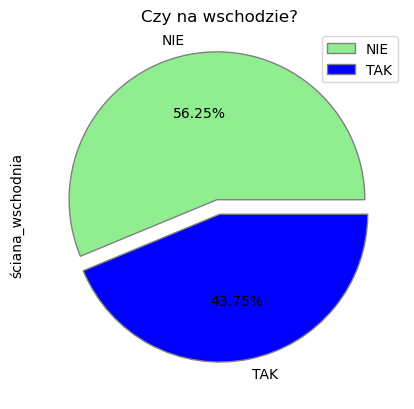

In [24]:
data.ściana_wschodnia.value_counts().plot.pie(legend={'loc':'best'},
                                    colors=['lightgreen', 'blue'],
                                    autopct='%.2f%%',
                                    explode=[0.1,0],
                                    title = 'Czy na wschodzie?',
                                    wedgeprops={'linewidth': 1, 
                                               'edgecolor' :'gray'})

43.75% województw jest na wschodzie.

#### Histogram przedstawiający liczbę miejsc noclegowych na 1000 mieszkańców

<AxesSubplot:title={'center':'Liczba miejsc noclegowych na 1000 ludności'}, ylabel='Frequency'>

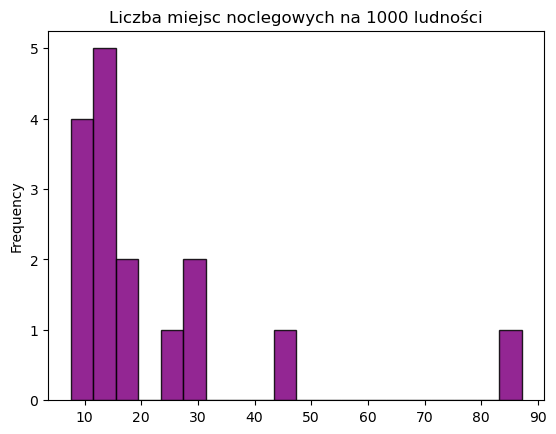

In [25]:
data.miejsca_noclegowe.plot.hist(color='purple',
                      alpha=0.85, 
                      bins=20,
                      edgecolor='black',
                      title='Liczba miejsc noclegowych na 1000 ludności')

Dla większości województw w Polsce liczba miejsc noclegowych na tysiąc mieszkańców nie przekracza 35. </br>
Tylko w dwóch województwach miejsc noclegowych jest więcej; w jednym około 45 na tysiąc mieszkańców, </br>
a w drugim około 85 miejsc noclegowych na tysiąc mieszkańców.

#### Wykres rozrzutu dla zmiennych: `ofiary_śmiertelne` i `drogi_ekspresowe_i_autostrady`

<AxesSubplot:xlabel='ofiary_śmiertelne', ylabel='drogi_ekspresowe_i_autostrady'>

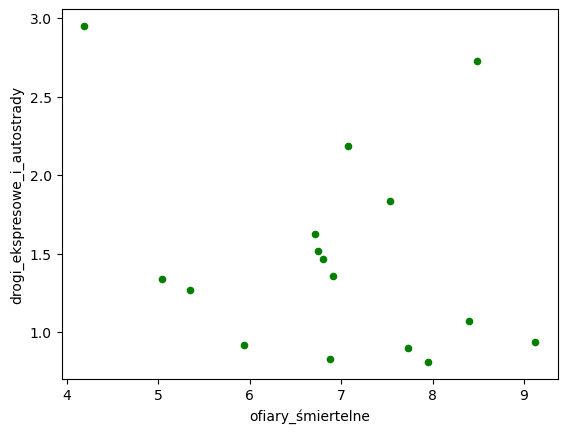

In [26]:
data.plot.scatter(x='ofiary_śmiertelne', y='drogi_ekspresowe_i_autostrady', color = ['green'])

Na wykresie rozrzutu nie widać zależności między liczbą ofiar śmiertelnych a długością dróg ekspresowych i autostrad.

#### Macierzowe wykresy rozrzutu dla analizowanych zmiennych

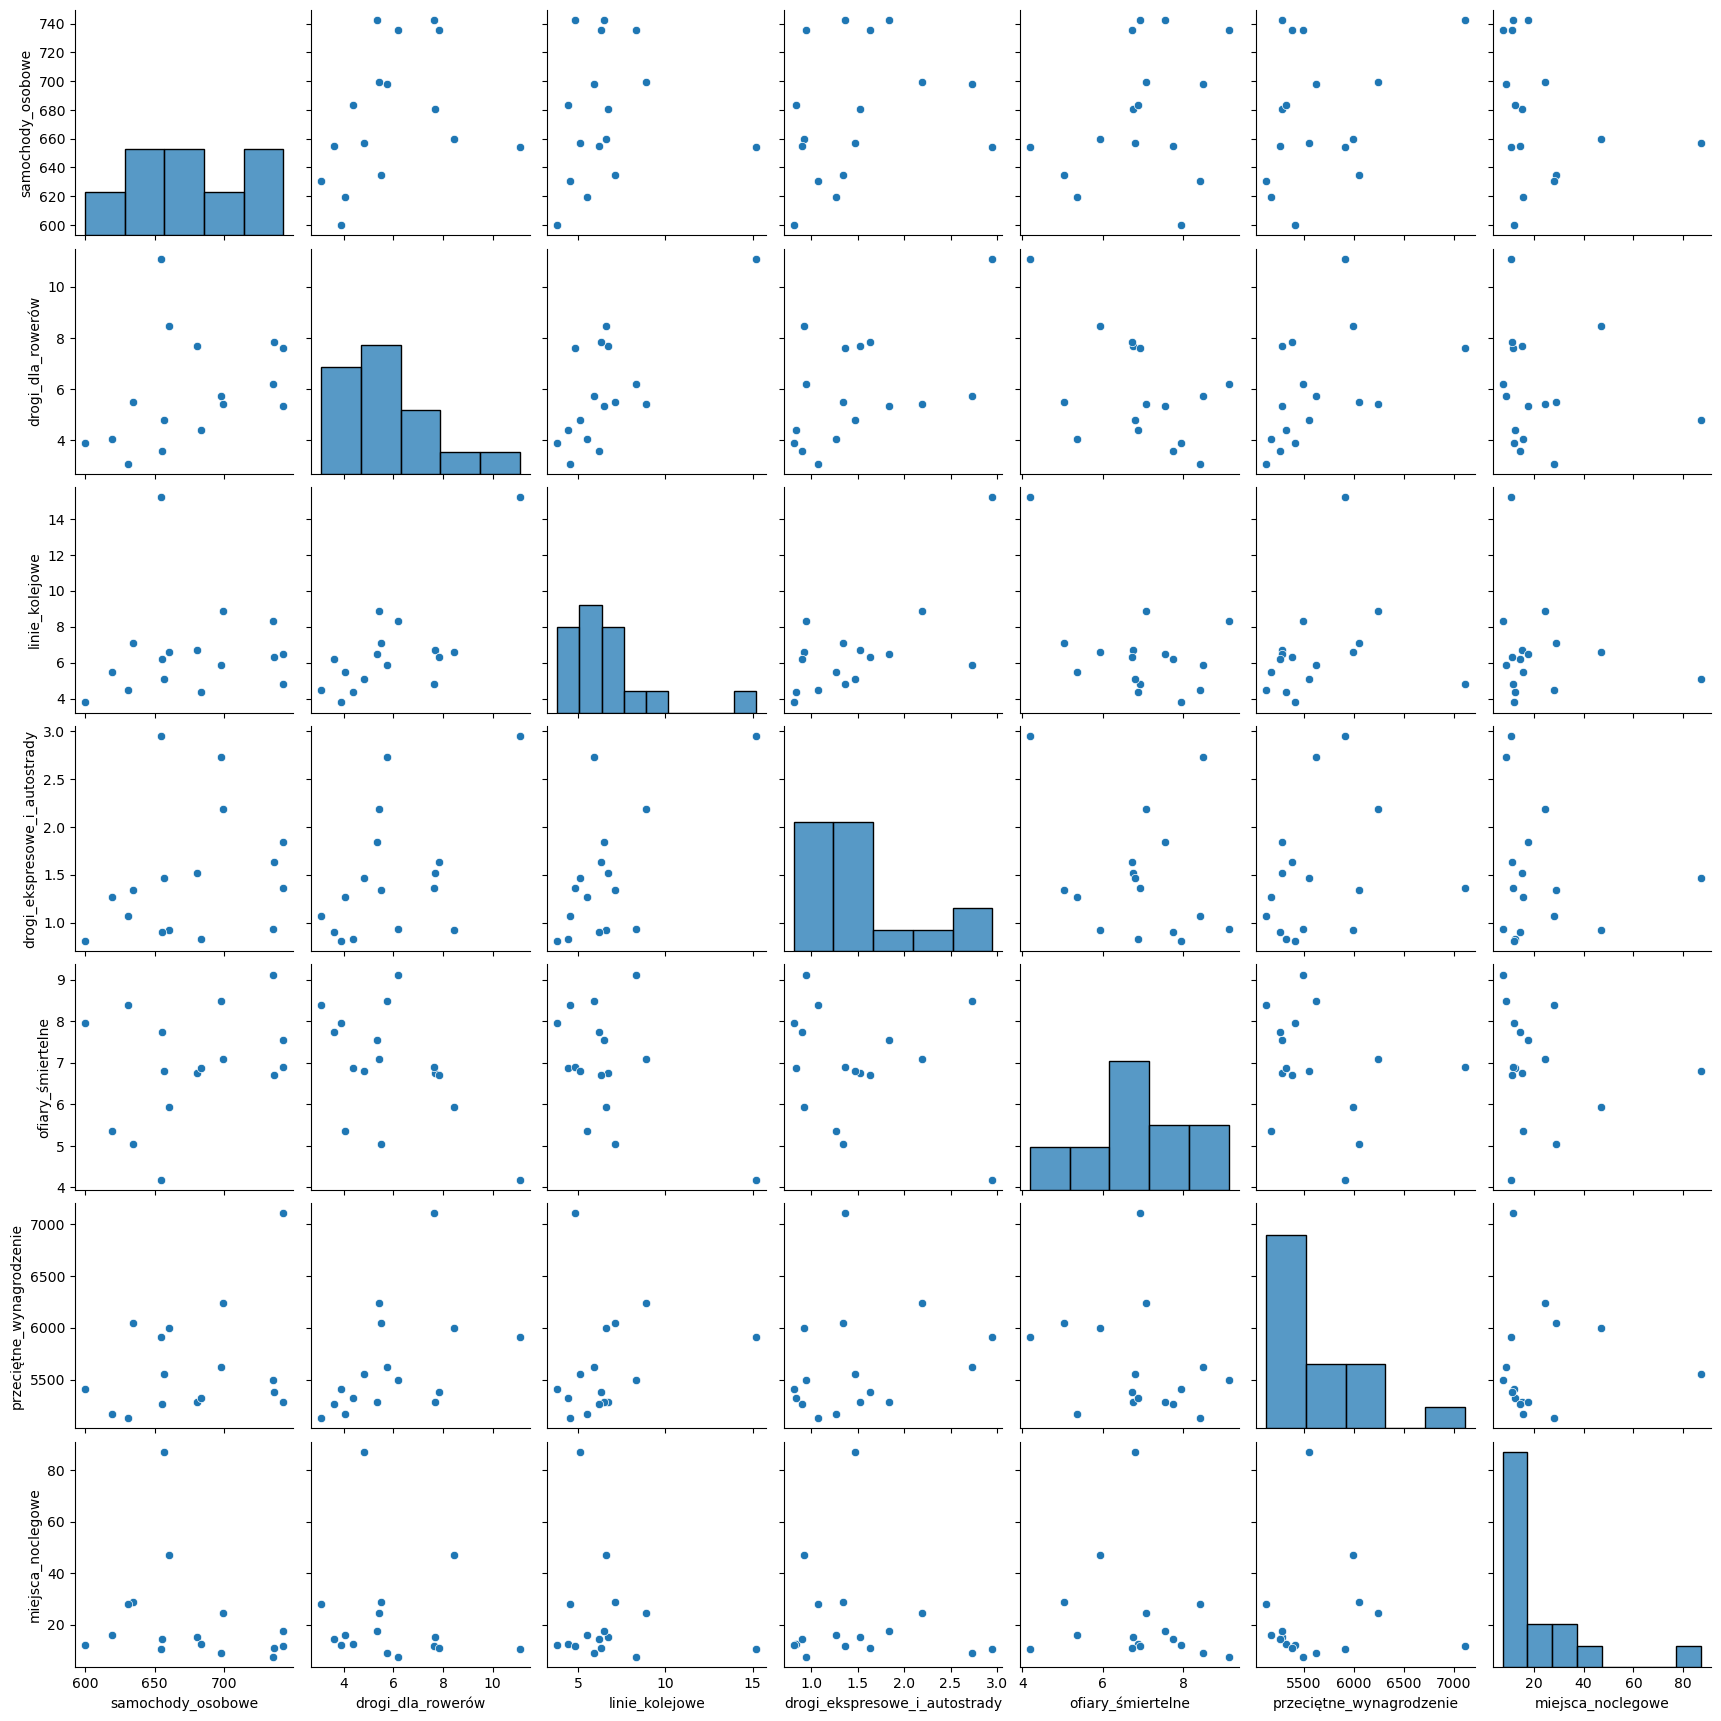

In [27]:
sns.pairplot(data)
plt.show()

Na macierzowym wykresie rozrzutu nie można w większości przypadków zaobserwować silnej zależności liniowej między zmiennymi. Pewną zależność liniową zaobserwować mozna dla par zmiennych: drogi </br>
dla rowerów na 100 km2 oraz linie kolejowe ogółem na 100 km2. Ponadto, słabą korelację liniową dodatnią zaobserwować można dla zmiennych: przeciętne wynagrodzenie i  linie kolejowe ogółem na 100 km2 </br> oraz miejsca noclegowe oraz  linie kolejowe ogółem na 100 km2. 

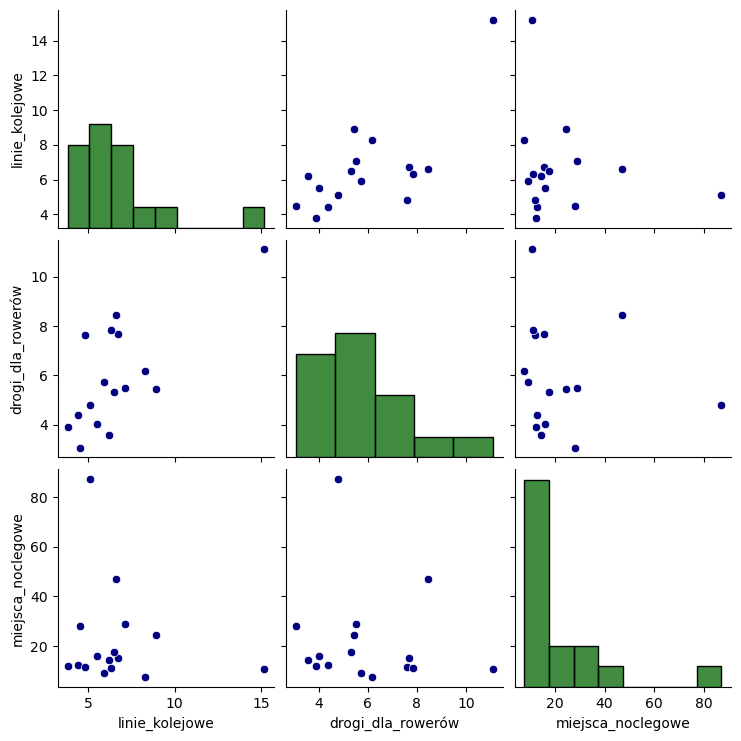

In [28]:
sns.pairplot(data.loc[:,['linie_kolejowe', 'drogi_dla_rowerów', 'miejsca_noclegowe']],
             plot_kws ={'color': 'navy'},
            diag_kws = {'color': 'darkgreen'})
plt.show()

W celu dokładniejszego zaobserwowania wspomnianyh wyżej korelacji, sporządzono macierzowy wykres rozruztu tylko dla wspomnianych zmiennych. Największą dodatnia korelację liniową zaobserowowac można dla zmiennych: `drogi_dla_rowerów` oraz `linie_kolejowe`.

#### Korelacje

In [29]:
macierz_kor = data.corr().round(2)
macierz_kor

,samochody_osobowe,drogi_dla_rowerów,linie_kolejowe,drogi_ekspresowe_i_autostrady,ofiary_śmiertelne,przeciętne_wynagrodzenie,miejsca_noclegowe
samochody_osobowe,1.00,0.35,0.10,0.24,0.31,0.30,-0.26
drogi_dla_rowerów,0.35,1.00,0.70,0.51,-0.51,0.46,-0.11
linie_kolejowe,0.10,0.70,1.00,0.66,-0.49,0.21,-0.17
drogi_ekspresowe_i_autostrady,0.24,0.51,0.66,1.00,-0.27,0.23,-0.13
ofiary_śmiertelne,0.31,-0.51,-0.49,-0.27,1.00,-0.27,-0.16
przeciętne_wynagrodzenie,0.30,0.46,0.21,0.23,-0.27,1.00,0.04
miejsca_noclegowe,-0.26,-0.11,-0.17,-0.13,-0.16,0.04,1.00


<AxesSubplot:>

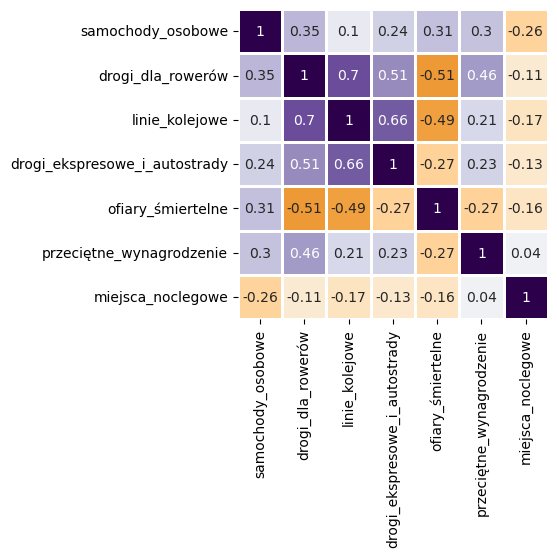

In [30]:
plt.figure(figsize=(4,10)) 
sns.heatmap(macierz_kor, 
            vmin=-1, 
            vmax=1, 
            cmap='PuOr',
            linecolor='white',
            linewidth=1,
            cbar=False,
            annot= True,
            square=True,
            cbar_kws={"orientation": "horizontal"})

#### Modele ekonometryczne

In [31]:
data_a = sm.add_constant(data)

In [32]:
model1 = sm.OLS(endog=data_a['samochody_osobowe'], 
                 exog=data_a[['przeciętne_wynagrodzenie','drogi_ekspresowe_i_autostrady','drogi_dla_rowerów']]).fit()

model1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      samochody_osobowe   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              511.2
Date:                Thu, 19 Jan 2023   Prob (F-statistic):                    9.80e-14
Time:                        21:52:09   Log-Likelihood:                         -88.785
No. Observations:                  16   AIC:                                      183.6
Df Residuals:                      13   BIC:                                      185.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
przeciętne_wynagrodzenie          0.1181      0.011     11.103      0.000       0.095       0.141
drogi_ekspresowe_i_autostrady    14.7589     31.471      0.469      0.647     -53.230      82.748
drogi_dla_rowerów                -2.5353     10.302     -0.246      0.809     -24.792      19.722
==============================================================================
Omnibus:                        1.466   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.481   Jarque-Bera (JB):                0.850
Skew:                           0.065   Prob(JB):                        0.654
Kurtosis:                       1.878   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

W kolejnym etapie przeprowadzonego badania sporządzono model ekonometryczny. Za zmienną objaśnianą przyjęto liczbę samochodów osobowych na 1000 ludności, a na zmienne objaśniające wybrano miesięczne wynagrodzenie brutto, drogi ekspresowe i autostrady na 100 km2 oraz drogi dla rowerów na 100 km2. Współczynnik determinacji R2 wskazuje na fakt, iż zmienna objaśniana wyjaśniona jest przez zmienne objaśniające w 99,2%, a więc model jest dobrze dopasowany do danych.
Wektor parametrów strukturalnych wyznaczonego modelu przyjmuje postać: y = 0,12 X1 + 14,76 x2 - 2,54 X3, gdzie:

X1 - miesięczne wynagrodzenie brutto

X2 - drogi ekspresowe i autostrady na 100 km2

X3 - drogi dla rowerów na 100 km2


Zdecydowano się zweryfikować istotność poszczególnych parametrów strukturalnych. Wartość p-value dla zmiennej przeciętne wynagrodzenie jest wyraźnie niższe niż założony poziom istotności 0,05, zatem uznać można, że zmienna ta jest istotna. W przypadku zmiennych drogi ekspresowe i autostrady na 100 km2 oraz drogi dla rowerów na 100 km2 poziom p-value jest wysoki, odpowiednio 0,647 i 0,809. 

Na poziomie istotności 0,05 nie ma podstaw do odrzucenia hipotezy zerowej. Wysunięto zatem wniosek, który jednoznacznie stwierdza brak istotności parametrów przy drugiej oraz trzeciej zmiennej objaśniającej. Długość dróg ekspresowych i autostrad oraz długość dróg dla rowerów nie wpływają istotnie na ilość samochodów osobowych. Zmienna X2 i X3 zostaną usunięte z modelu, gdyż nie wpływają na kształtowanie się zmiennej zależnej. 

#### Drugi model

In [33]:
model2 = sm.OLS(endog=data_a['samochody_osobowe'], 
                 exog=data_a[['przeciętne_wynagrodzenie']]).fit()

model2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      samochody_osobowe   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              1740.
Date:                Thu, 19 Jan 2023   Prob (F-statistic):                    6.28e-17
Time:                        21:52:09   Log-Likelihood:                         -88.920
No. Observations:                  16   AIC:                                      179.8
Df Residuals:                      15   BIC:                                      180.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
przeciętne_wynagrodzenie     0.1193      0.003     41.708      0.000       0.113       0.125
==============================================================================
Omnibus:                        0.873   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.680
Skew:                          -0.019   Prob(JB):                        0.712
Kurtosis:                       1.991   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Po usunięciu niestotnych zmiennych z modelu otrzymano równanie z jedną zmienną objaśniającą - przeciętrne wynagrodzenie brutto, y = 0,12 X1
Otrzymane parametry można więc interpretować w następujący sposób: 

Jeżeli miesięczne wynagrodzenie brutto wzrośnie o jedną jednostkę, to liczba samochodów osobowych wzrośnie średnio o 0,12, przy założeniu, że długość dróg ekspresowych i autostrad na 100 km2 oraz dróg dla rowerów na 100 km2 nie ulegną zmianie.  

Współczynnik determinacji osiąga wartość 0,991, a więc model jest bardzo dobrze dopasowany do danych. P-value kształtuje się na poziomie 0,0, zatem zmienna jest istotna. Można zatem wnioskować, że wysokość wynagrodzenia brutto na poziomie istotności 0,05 wpływa na liczbę samochodów osobowych. 

Po weryfikacji istotności parametrów zdecydowano się na sprawdzenie normalności reszt rozkładu przy pomocy testu Jarque Bera na poziomie istotności 0,05. Statystyka testu wynosi 0,68. Wartość krytyczna odczytana z tablic rozkładu Chi2 wynosi 5,99. Wnioskować zatem można, że należy przyjąć hipotezę zerową. Reszty modelu mają rozkład normalny. 

In [34]:
model3 = sm.OLS(endog=data_a['samochody_osobowe'], 
                 exog=data_a[['drogi_dla_rowerów','ofiary_śmiertelne']]).fit()

model3.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      samochody_osobowe   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              876.7
Date:                Thu, 19 Jan 2023   Prob (F-statistic):                    1.96e-15
Time:                        21:52:09   Log-Likelihood:                         -88.309
No. Observations:                  16   AIC:                                      180.6
Df Residuals:                      14   BIC:                                      182.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
drogi_dla_rowerów    36.3242      5.833      6.228      0.000      23.814      48.834
ofiary_śmiertelne    65.8002      5.189     12.681      0.000      54.671      76.929
==============================================================================
Omnibus:                        0.739   Durbin-Watson:                   2.907
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.712
Skew:                           0.276   Prob(JB):                        0.700
Kurtosis:                       2.126   Cond. No.                         4.33
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

W drugim modelu ekonometrycznym, który zdecydowano się stworzyć, zmienną objaśnianą ponownie jest liczba samochodów osobowych. Zmiennymi objaśniającymi natomiast są: drogi dla </br> rowerów na 100 km2 oraz ofiary śmiertelne na 100 tysięcy mieszkańców. 
Współczynnik determinacji R2 wskazuje na fakt, iż zmienna objaśniana wyjaśniona jest przez zmienne objaśniające w 99,2%, a więc model jest dobrze dopasowany do danych.

Wektor parametrów strukturalnych wyznaczonego modelu przyjmuje postać: y = 36,32 X3 + 65,8 X4 , gdzie:

X3 - drogi dla rowerów na 100 km2

X4 - ofiary śmiertelne na 100 tysięcy mieszkańców

Otrzymane parametry można więc interpretować w następujący sposób: 

Jeżeli długość dróg dla rowerów wzrośnie o jedną jednostkę, to liczba samochodów osobowych wzrośnie średnio o 36,32, przy założeniu, że liczba ofiar śmiertelnych w tym okresie nie ulegnie zmianie. </br>
Jeżeli liczba ofiar śmiertelnych na 100 tysięcy pojazdów wzrośnie o jedną jednostkę, to liczba samochodów osobowych wzrośnie średnio o 65,8, przy założeniu, że długość dróg dla rowerów nie ulegnie zmianie.


Analizując istotność parametrów struktualnych zaobserwowano, że w przypadku obu zmiennych p-value przymuje wartość zerową, co oznacza, że na poziomie istotności 0,05, zmienne te są istotne. Wnisokować zatem można, że długość dróg dla rowerów oraz liczba ofiar śmiertelnych wpływa istotnie na liczbę samochodów osobowych. 

Po weryfikacji istotności parametrów zdecydowano się na sprawdzenie normalności reszt rozkładu przy pomocy testu Jarque Bera na poziomie istotności 0,05. Statystyka testu wynosi 0,712. Wartość krytyczna odczytana z tablic rozkładu Chi2 wynosi 5,99. Wnioskować zatem można, że należy przyjąć hipotezę zerową. Reszty modelu mają rozkład normalny. 

#### Odpowiedzi na pytania badawcze

1. Jak kształtują się średnie wartości zmiennej: liczba samochodów osobowych w podziale na wschodnią oraz zachodnią część Polski?
* Na podstawie przeprowadzonego badania stwierdzić można, że średnio w województwach na zachodzie Polski jest o 43 więcej samochodów osobowych na tysiąc mieszkańców, niż w województwach wschodnich.
2. Czy można zaobserowować korelacje między zmiennymi?
* Na podstawie macierzowego wykresu rozrzutu nie można zaobserwować wyraźnych, silnych korelacji między zmiennymi. Na macierzowym wykresie rozrzutu nie można w większości przypadków zaobserwować silnej zależności liniowej między zmiennymi. Niezbyt silna, dodatnią zależność liniową zaobserwować mozna dla par zmiennych: drogi dla rowerów na 100 km2 oraz linie kolejowe ogółem na 100 km2. Ponadto, słabą, dodatnią korelację liniową dodatnią zaobserwować można dla zmiennych: przeciętne wynagrodzenie i  linie kolejowe ogółem na 100 km2 oraz miejsca noclegowe oraz  linie kolejowe ogółem na 100 km2. 
3. Jak prezentuje się postać liniowego modelu ekonometrycznego?
* Zdecydowano się na stworzenie dwóch modeli ekonometrycznych. Pierwszy z nich przyjął finalnie postać: y = 0,12 X1, gdzie Y- liczba samochodów osobowych, a X1 - przeciętne wynagrodzenie brutto. Drugi model natomiast przyjął postać: y = 36,32 X3 + 65,8 X4 , gdzie: Y- liczba samochodów osobowych, X3 - drogi dla rowerów na 100 km2, a X4 - ofiary śmiertelne na 100 tysięcy mieszkańców
4. Czy oszacowane modele są istotne?
* Po weryfikacji istotności parametrów strukturalnych modeli stwierdzono, że w przypadku pierwszego modelu, wysokość wynagrodzenia brutto na poziomie istotności 0,05 wpływa na liczbę samochodów osobowych. Parametry drugiego modelu również okazały się istotne, zatem stwierdzono, że długość dróg dla rowerów oraz liczba ofiar śmiertelnych wpływa istotnie na liczbę samochodów osobowych. 
5. Czy reszty modeli mają rozkład normalny?
* Po zastosowaniu testu Jarque Bera dla obu modeli ekonometrycznych, stwierdzono w obu przypadkach, że na poziomie istotności 0,05 należy przyjąć hipotezę zerową, a więc reszty otrzymane z powstałych modeli, mają rozkład normalny. 